In [1]:
import sys
src_dir = '/Users/palmerio/Science_projects/GRB_population_model/src/'
sys.path.insert(0, src_dir)
verbose = True
run_mode = 'debug'
import prototype_GRB_population as pt
from GRB_population import GRBPopulation
import physics as ph
import numpy as np
import io_grb_pop as io
import miscellaneous as msc
from cosmology import init_cosmology
from ECLAIRs import init_ECLAIRs
import observational_constraints as obs

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('presentation')


In [3]:
paths_to_dir, paths_to_files = io.generate_paths()

20:00:19.934 [DEBUG] Root directory is /Users/palmerio/Science_projects/GRB_population_model
20:00:19.935 [DEBUG] Directory paths :
    'root'    : /Users/palmerio/Science_projects/GRB_population_model
    'obs'     : /Users/palmerio/Science_projects/GRB_population_model/observational_constraints
    'init'    : /Users/palmerio/Science_projects/GRB_population_model/init
    'output'  : /Users/palmerio/Science_projects/GRB_population_model/model_outputs
    'data'    : /Users/palmerio/Science_projects/GRB_population_model/data
    'cosmo'   : /Users/palmerio/Science_projects/GRB_population_model/data/cosmology
    'ECLAIRs' : /Users/palmerio/Science_projects/GRB_population_model/data/ECLAIRs
20:00:19.936 [DEBUG] File paths :
    'config'  : /Users/palmerio/Science_projects/GRB_population_model/init/config.yml
    'param'   : /Users/palmerio/Science_projects/GRB_population_model/init/parameters.yml
    'instrum' : /Users/palmerio/Science_projects/GRB_population_model/init/instruments.yml

In [4]:
config, params, instruments, samples = io.read_init_files(paths_to_files)
config['Nb_GRBs'] = '2.5e5'
config['samples'] = ['Stern', 'EpGBM', 'eBAT6']
config['output_dir'] = 'debugger'
params['spectral_shape']['model'] = 'GBM_Band_old'
paths_to_dir['output'] = paths_to_dir['output']/config['output_dir']
config
params

20:00:20.225 [DEBUG] Input configuration:
Nb_GRBs: 1e5
likelihood:
    epsilon: 0.001
output_dir: debugger
samples:
- Stern
- EpGBM
- eBAT6
- Swift
- ECLAIRs
- SHOALS
- GBM_sample
- BATSE_5B_sample
save_all_GRBs: false

20:00:20.227 [DEBUG] Input parameters:
Cvar_distribution:
    correl_slope: 0.413
    mu: 0.04
    sigma: 0.22
luminosity_function:
    k_evol: 1.0
    logLbreak: 52.56
    logLmax: 53.0
    logLmin: 49.6989700043
    model: ES
    slope: 1.41
peak_energy_distribution:
    Ep0: 690
    alpha_amati: 0.3
    model: LN
    sigmaEp: 0.45
redshift_distribution:
    a: 0.94
    b: -0.52
    model: BExp
    zeta: null
    zm: 2.18
    zmax: 20
spectral_shape:
    alpha: 0.6
    beta: 2.5
    model: GBM_Band
t90obs_distribution:
    mu: 1.45
    sigma: 0.47



{'luminosity_function': {'model': 'ES',
  'logLmin': 49.6989700043,
  'logLmax': 53.0,
  'logLbreak': 52.56,
  'slope': 1.41,
  'k_evol': 1.0},
 'redshift_distribution': {'model': 'BExp',
  'zmax': 20,
  'zm': 2.18,
  'a': 0.94,
  'b': -0.52,
  'zeta': None},
 'spectral_shape': {'model': 'GBM_Band_old', 'alpha': 0.6, 'beta': 2.5},
 'peak_energy_distribution': {'model': 'LN',
  'Ep0': 690,
  'sigmaEp': 0.45,
  'alpha_amati': 0.3},
 't90obs_distribution': {'mu': 1.45, 'sigma': 0.47},
 'Cvar_distribution': {'mu': 0.04, 'sigma': 0.22, 'correl_slope': 0.413}}

In [5]:
print(paths_to_dir['output'])

/Users/palmerio/Science_projects/GRB_population_model/model_outputs/debugger


In [6]:
cosmo = init_cosmology(paths_to_dir['cosmo'])
ECLAIRs_prop = init_ECLAIRs(ECLAIRs_dir=paths_to_dir['ECLAIRs'],
                            ECLAIRs_config=instruments['ECLAIRs'])
samples['ECLAIRs']['pflx_min'] = ECLAIRs_prop['bkg_total']

Nb_GRBs = int(float(config['Nb_GRBs']))

incl_samples = msc.included_samples(config['samples'], samples)
incl_instruments = msc.included_instruments(incl_samples, instruments)

20:00:20.728 [DEBUG] ==============================================
20:00:20.729 [DEBUG] ===           ECLAIRs instrument           ===
20:00:20.730 [DEBUG] ==============================================
20:00:20.731 [DEBUG] ECLAIRs energy channel: 4.0 to 150.0 keV
20:00:20.731 [DEBUG] ECLAIRs detection level: 6.5 sigmas
20:00:20.756 [DEBUG] Effective area: from 1.013650e+02 cm2 at 4.00 keV
20:00:20.757 [DEBUG] Effective area: to   1.811580e+02 cm2 at 250.00 keV
20:00:20.758 [DEBUG] Background: from 2.819620e+02 cts/s/keV at 4.00 keV
20:00:20.758 [DEBUG] Background: to   8.730200e-02 cts/s/keV at 250.00 keV
20:00:20.759 [DEBUG] ECLAIRs background: 3.098396e+03 cts/s from 4.00 keV to 150.00 keV
20:00:20.760 [DEBUG] ==============================================
20:00:20.761 [INFO] Including samples: ['Stern', 'EpGBM', 'eBAT6']
20:00:20.763 [DEBUG] Including samples:
EpGBM:
    instrument: BATSE
    pflx_min: 0.9
Stern:
    instrument: BATSE
    pflx_min: 0.066825
eBAT6:
    instrument: 

20:00:20.962 [INFO] Debug mode activated; plotting z pdf
20:00:21.059 [INFO] Debug mode activated; plotting L pdf
20:00:21.141 [INFO] Debug mode activated; plotting Ep pdf
20:00:21.201 [INFO] Debug mode activated; plotting t90obs pdf
20:00:21.269 [INFO] Debug mode activated; plotting Cvar pdf
20:00:21.401 [INFO] Debug mode activated; plotting spectral params pdf
===                         SUMMARY                                ===
 prop 	| median 	| stdev 	| min    	| max
---------------------------------------------------------------------- 
 z	| 2.36600e+00 	| 1.39161e+00 	| 5.20000e-02 	| 1.79740e+01 
 L	| 7.59671e+50 	| 2.27839e+52 	| 5.68500e+49 	| 1.15499e+54 
 Ep	| 6.90064e+02 	| 1.63075e+03 	| 2.69776e+00 	| 7.24686e+04 
 t90obs	| 2.81130e+01 	| 7.51742e+01 	| 1.61878e-01 	| 3.99169e+03 
 Cvar	| 2.76080e-01 	| 2.22724e-01 	| 1.04984e-02 	| 1.00000e+00 
 alpha	| 6.50000e-01 	| 4.51507e-01 	| -9.75000e-01 	| 1.85000e+00 
 beta	| 2.90000e+00 	| 3.82795e+00 	| 2.01000e+00 	| 2.190

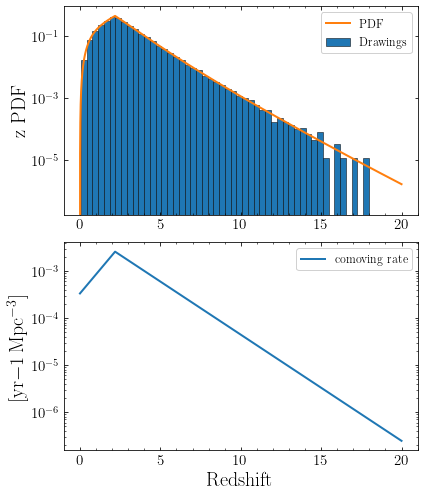

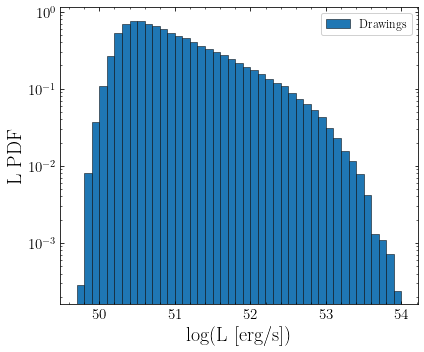

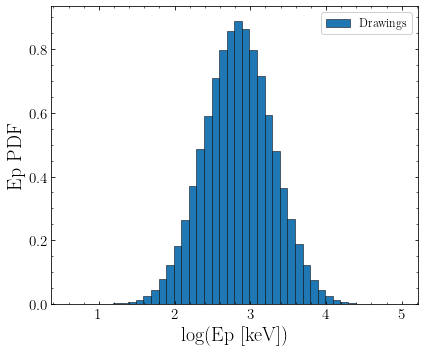

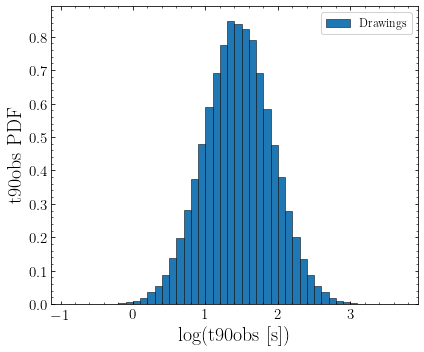

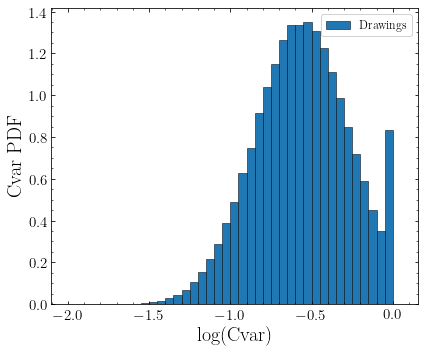

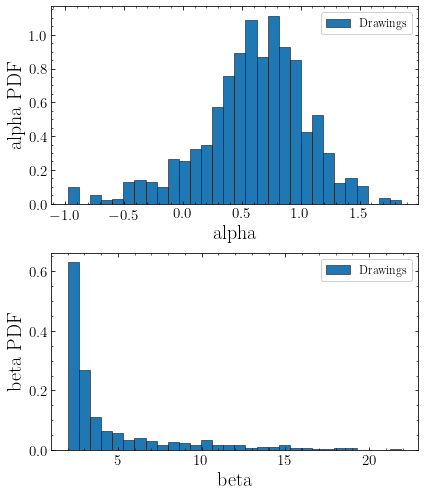

In [7]:
# np.random.seed(1)
GRB_population = GRBPopulation(Nb_GRBs, output_dir=paths_to_dir['output'])
GRB_prop = GRB_population.draw_GRB_properties(cosmo=cosmo, params=params, run_mode='debug')

ph.calc_peak_photon_flux(GRB_prop, incl_instruments, ECLAIRs_prop)
# ph.calc_peak_energy_flux(GRB_prop, incl_instruments, ECLAIRs_prop)
# ph.calc_photon_fluence(GRB_prop, incl_instruments)
# ph.calc_energy_fluence(GRB_prop, incl_instruments)
ph.calc_det_prob(GRB_prop, incl_samples, **ECLAIRs_prop)

In [8]:
df = pd.DataFrame(GRB_prop)
df

,z,L,Ep,t90obs,Cvar,alpha,beta,ktild,D_L,Epobs,Eiso,t90,pht_pflx_BATSE,pht_pflx_BAT,pdet_Stern,pdet_EpGBM,pdet_eBAT6
0,1.522,5.354058e+52,897.075523,6.782758,0.478679,1.125,2.70,0.661868,11211.786346,355.700049,6.892689e+52,2.689436,6.168911,10.758785,1.0,1.0,1.0
1,1.179,1.856065e+50,3310.011610,18.788962,0.259853,0.975,2.10,0.237462,8150.753274,1519.050762,4.158783e+50,8.622745,0.003491,0.004624,0.0,0.0,0.0
2,5.890,8.512847e+50,342.694032,29.514797,0.345722,0.650,3.80,1.607058,57710.254191,49.737886,1.260733e+51,4.283715,0.006288,0.025256,0.0,0.0,0.0
3,1.939,2.286899e+50,2422.073544,21.256350,0.561636,-0.025,2.40,2.058076,15144.703314,824.114850,9.289464e+50,7.232511,0.002493,0.001640,0.0,0.0,0.0
4,2.217,3.594618e+50,5646.529453,27.598639,0.102944,0.350,2.01,0.051432,17865.932748,1755.215870,3.174604e+50,8.578999,0.000050,0.000039,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,5.419,8.339691e+50,1853.430995,28.343634,0.243296,0.675,2.10,0.328234,52339.432962,288.741392,8.959296e+50,4.415584,0.001307,0.001770,0.0,0.0,0.0
249996,1.574,9.039425e+51,465.551885,42.576004,0.188058,-0.950,16.00,12.728199,11690.892985,180.867088,2.811828e+52,16.540794,2.163263,1.978284,1.0,1.0,0.0
249997,1.567,1.308586e+51,224.685465,15.873935,0.202804,1.050,2.10,0.218569,11626.191557,87.528424,1.641106e+51,6.183847,0.067938,0.173097,1.0,0.0,0.0
249998,1.768,1.108595e+51,269.884274,39.387427,0.234664,1.100,4.60,0.843367,13508.011294,97.501544,3.701788e+51,14.229562,0.163113,0.426056,1.0,0.0,0.0


20:00:30.692 [INFO] Global GRB rate: 1137.9500015101319
20:00:30.702 [INFO]           Stern chi2: 2.3051e+01
20:00:30.703 [INFO]  Stern normalization: 1.3456e-02 yr-1
20:00:30.704 [INFO]  Simulation duration: 7.4314e+01 yr
20:00:30.705 [INFO]            ndot_LGRB: 3.3641e+03 LGRB/yr


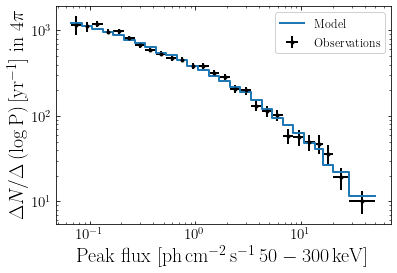

In [9]:
norm_Stern, mod_Stern = obs.compare_to_Stern(df[df['pdet_Stern']==1]['pht_pflx_BATSE'],
                         Stern_file=paths_to_dir['obs']/'Stern_lognlogp_rebinned.txt',
                         Nb_GRBs=Nb_GRBs, show_plot=True)

20:00:51.676 [INFO]           EpGBM chi2: nan
20:00:51.677 [INFO]  EpGBM normalization: nan


/Users/palmerio/Science_projects/GRB_population_model/src/observational_constraints.py:207: RuntimeWarning: invalid value encountered in double_scalars
  norm = np.sum(obs_lin*mod/err_lin**2) / np.sum((mod/err_lin)**2)


nan

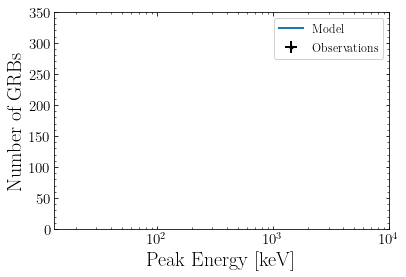

In [11]:
obs.compare_to_EpGBM(df[df['pdet_EpGBM']==1]['Epobs'],
                         GBM_file=paths_to_dir['obs']/'EpGBM_for_plotting.txt',
                        show_plot=True)


In [12]:
obs.compare_to_eBAT6(df[df['pdet_eBAT6']==1]['z'],
                     eBAT6_file=paths_to_dir['obs']/'eBAT6_constraint_for_plotting.txt',
                     show_plot=True)


20:01:13.196 [INFO]           eBAT6 chi2: 1.0504e+01
20:01:13.197 [INFO]  eBAT6 normalization: 6.2045e-03


TypeError: plot_constraint() got an unexpected keyword argument 'bins_log'

In [13]:
f90_dir = paths_to_dir['output'].parent/'191205_best_k1_LN_nF'


In [14]:
dt = 'i4,i4,12f8,11f8,i4'
# i, L, z, D_L, Epobs, alpha, beta, ktild, Peakflux_Instrument, Prob_det
with open(f90_dir/'GRB_properties 0.dat', 'rb') as f:
    data = np.fromfile(f, dtype=dt, count=-1)
df_f90 = np.zeros((len(data),12))
for i,dat in enumerate(data):
    df_f90[i] = dat[2]

df_f90 = pd.DataFrame(df_f90, columns=['L', 'z', 'D_L', 'Epobs', 'alpha', 'beta', 'ktild',
                                     'pht_pflx_BATSE','pht_pflx_BAT','pht_pflx_FREGATE','pht_pflx_WXM','pht_pflx_ECLAIRs'])
# df_f90['L'] = np.log10(df_f90['L'])

20:01:28.929 [INFO] Global GRB rate: 1137.9500015101319
20:01:28.939 [INFO]           Stern chi2: 2.1912e+01
20:01:28.939 [INFO]  Stern normalization: 1.3084e-02 yr-1
20:01:28.940 [INFO]  Simulation duration: 7.6428e+01 yr
20:01:28.941 [INFO]            ndot_LGRB: 3.2711e+03 LGRB/yr


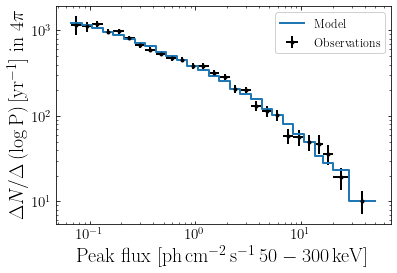

In [15]:
norm_Stern, mod_Stern = obs.compare_to_Stern(df_f90[df_f90['pht_pflx_BATSE']>=0.066825]['pht_pflx_BATSE'],
                         Stern_file=paths_to_dir['obs']/'Stern_lognlogp_rebinned.txt',
                         Nb_GRBs=Nb_GRBs, show_plot=True)

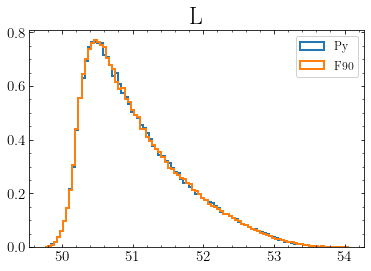

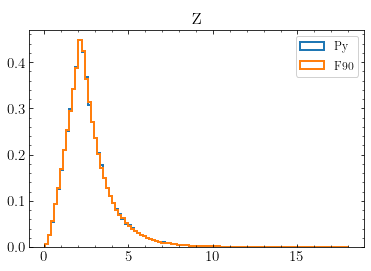

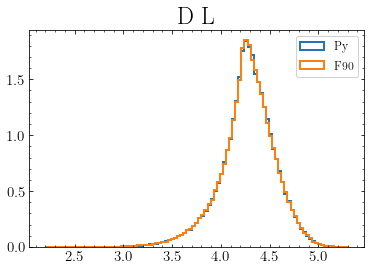

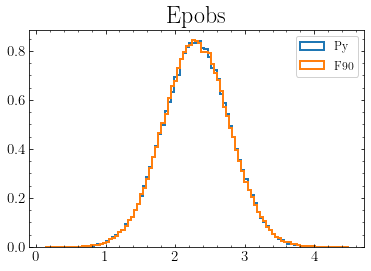

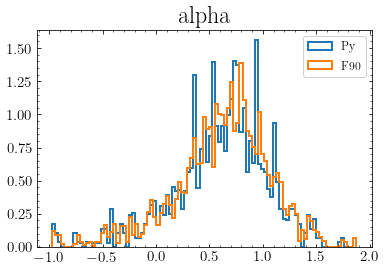

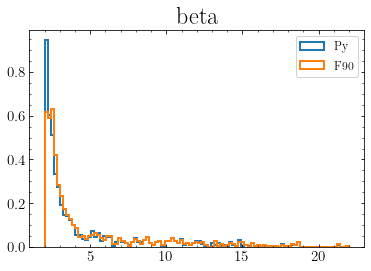

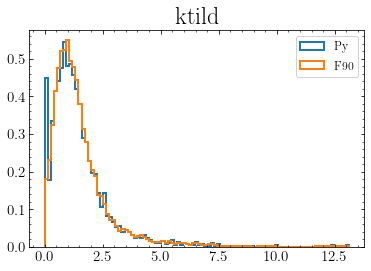

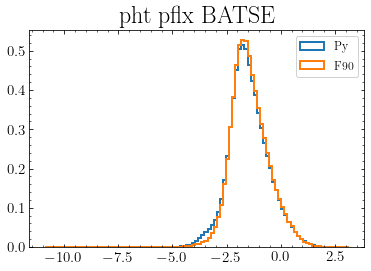

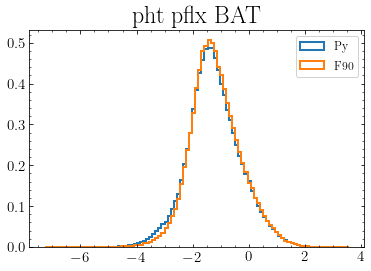